In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family']='Times New Roman'

# 第2章 绘图工具
第二章主要讲述python主流绘图工具库的使用，包括matplotlib、seraborn、proplot、SciencePlots。

## 2.1 Matplotlib
Matplotlib是Python最基本的绘图库，也是主流的绘图库，详细信息见[Matplotlib 官方文档](https://matplotlib.org/stable/tutorials/index) <br>。
以下是Matplotlib库常见的图类型：
|函数|图类型|
|:---|:---|
|plot()|折线图、点图等|
|scatter()|散点图|
|bar()/barh()|柱形图、条形图|
|axhline/axvline|垂直于X/Y轴的直线|
|axhspan()/axvspan()|垂直于X/Y轴的矩形块|
|text()|添加文本|
|fill_between()|面积图、填充图|
|pie()|饼图|
|bosplot()|箱线图|
|errorbar()|误差线|

### 2.1.1 设置轴比例
设置轴比例是为了控制图表在 x 轴和 y 轴上的刻度间距，以及数据在图表中的显示比例。有时候，数据的分布范围很大，可能会导致图表显示不够直观，设置轴比例可以使图表更易于理解。例如，当数据在一个轴上的范围远大于另一个轴时，设置轴比例可以减少数据在某个轴上的压缩或拉伸，使得数据的分布更清晰可见。
设置轴比例可以用`ax.set_yscale()`函数，可选的方式有`linear`、`log`、`symlog`、`logit`以及自定义函数`function_base`。
接下来展示前4种方式的例子。

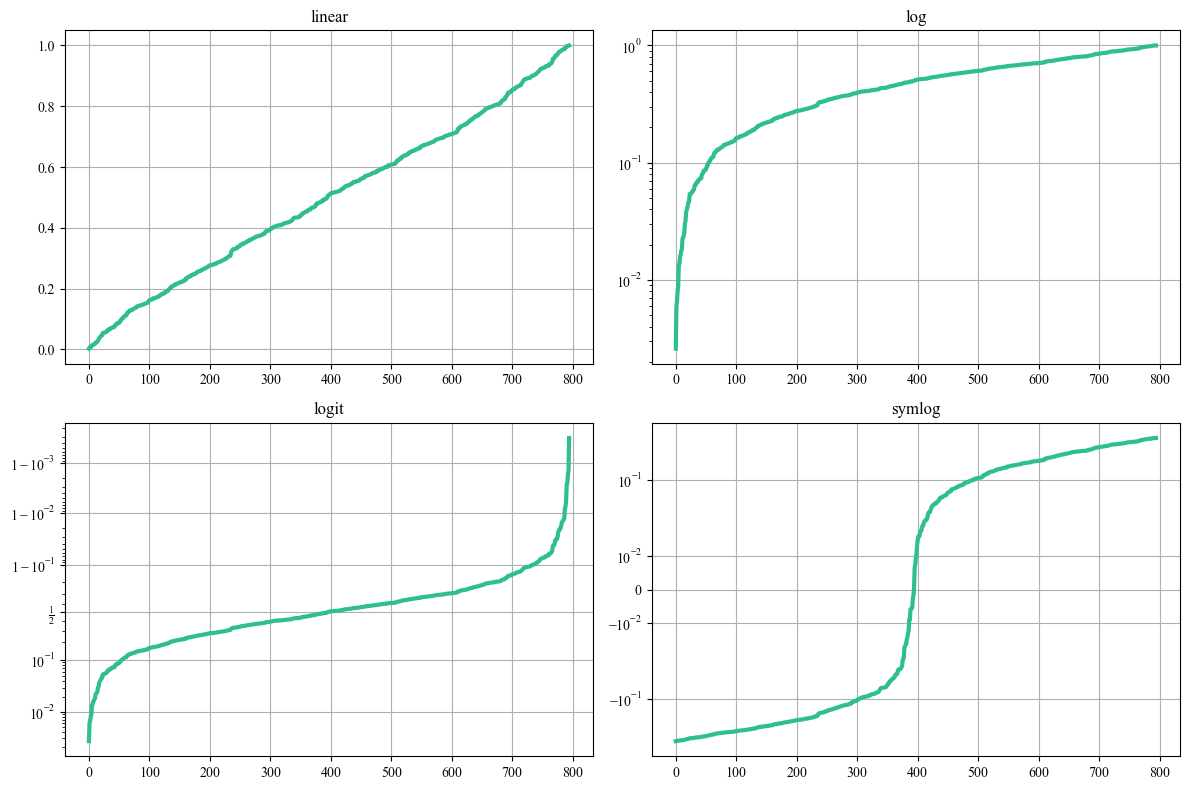

In [23]:
np.random.seed(2023)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=100,facecolor="w")
# linear
ax = axs[0, 0]
ax.plot(x, y,color="#2FBE8F",lw=3)
ax.set_yscale('linear')
ax.set_title('linear')
ax.grid(True)
# log
ax = axs[0, 1]
ax.plot(x, y,color="#2FBE8F",lw=3)
ax.set_yscale('log')
ax.set_title('log')
ax.grid(True)
# symmetric log
ax = axs[1, 1]
ax.plot(x, y - y.mean(),color="#2FBE8F",lw=3)
ax.set_yscale('symlog', linthresh=0.02)
ax.set_title('symlog')
ax.grid(True)
# logit
ax = axs[1, 0]
ax.plot(x, y,color="#2FBE8F",lw=3)
ax.set_yscale('logit')
ax.set_title('logit')
ax.grid(True)

plt.tight_layout()
plt.savefig('./images/demo_yscale.png',dpi=300) # 注意savefig要在show()前面，否则show的图片可能会一片空白
plt.show()

### 2.1.2 多图绘制
matplotlib提供了多种多图绘制的方法，包括subplot、subplots、gridspec等。这里介绍常用的3种：
1. subplot()


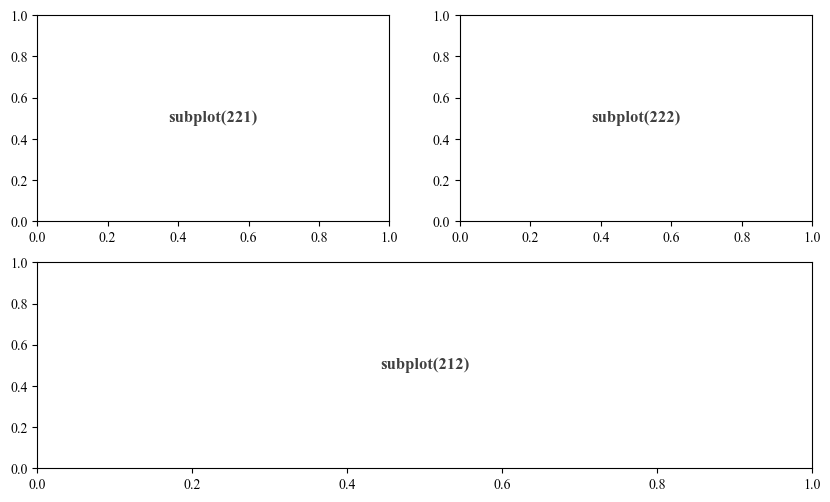

In [24]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
ax1 = plt.subplot(212)
ax1.text(0.5, 0.5, "subplot(212)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
ax2 = plt.subplot(221)
ax2.text(0.5, 0.5, "subplot(221)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
ax3 = plt.subplot(222)
ax3.text(0.5, 0.5, "subplot(222)", alpha=0.75, ha="center", va="center", weight="bold", size=12)

plt.savefig('./images/demo_subplot.png',dpi=300) # 注意savefig要在show()前面，否则show的图片可能会一片空白
plt.show()

2. subplots()

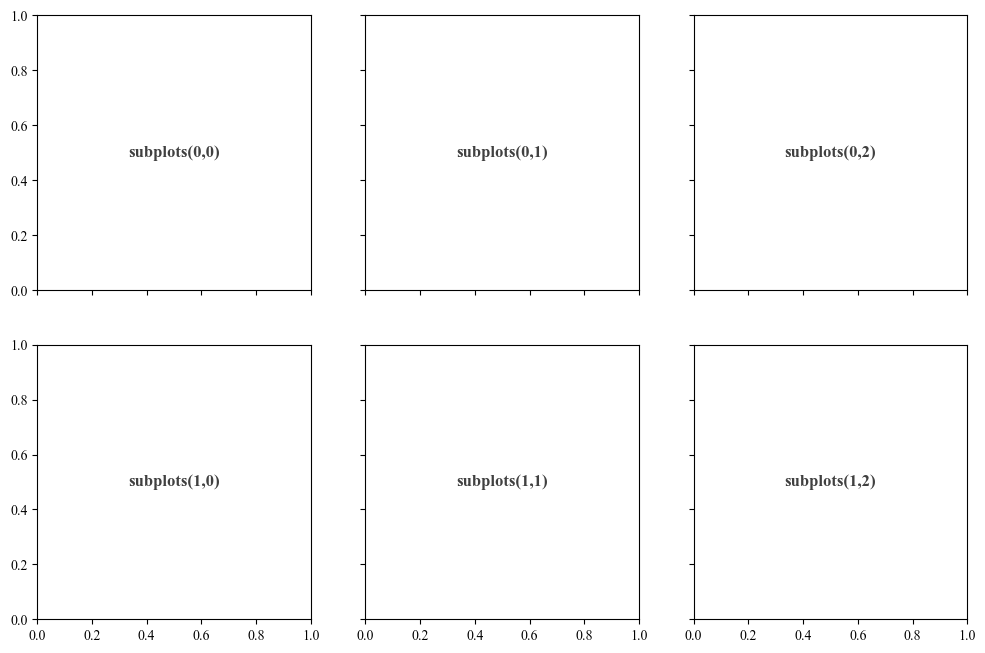

In [25]:
fig, axs = plt.subplots(2, 3,figsize=(12,8),dpi=100,sharex=True, sharey=True,facecolor="w")
axs[0,0].text(0.5, 0.5, "subplots(0,0)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[0,1].text(0.5, 0.5, "subplots(0,1)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[0,2].text(0.5, 0.5, "subplots(0,2)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[1,0].text(0.5, 0.5, "subplots(1,0)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[1,1].text(0.5, 0.5, "subplots(1,1)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
axs[1,2].text(0.5, 0.5, "subplots(1,2)", alpha=0.75, ha="center", va="center", weight="bold", size=12)

plt.savefig('./images/demo_subplots.png',dpi=300)
plt.show()

3. subplot2grid()

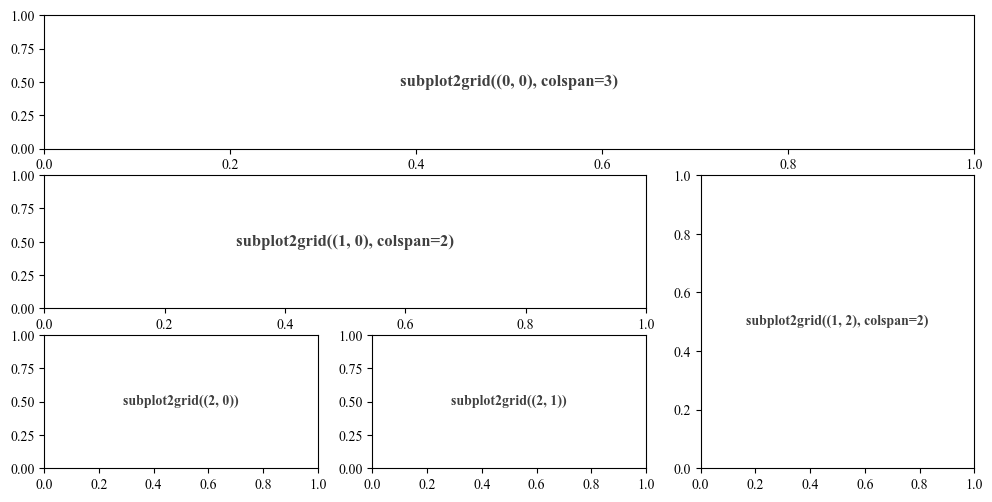

In [26]:
fig = plt.figure(figsize=(12,6),dpi=100,facecolor="w")
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1.text(0.5, 0.5, "subplot2grid((0, 0), colspan=3)", alpha=0.75, ha="center", va="center", weight="bold", size=12)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2.text(0.5, 0.5, "subplot2grid((1, 0), colspan=2)", alpha=0.75, ha="center", va="center", weight="bold",size=12)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax3.text(0.5, 0.5, "subplot2grid((1, 2), colspan=2)", alpha=0.75, ha="center", va="center", weight="bold",size=10)   
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax4.text(0.5, 0.5, "subplot2grid((2, 0))", alpha=0.75, ha="center", va="center", weight="bold",size=10)
ax5 = plt.subplot2grid((3, 3), (2, 1))
ax5.text(0.5, 0.5, "subplot2grid((2, 1))", alpha=0.75, ha="center", va="center", weight="bold",size=10)

plt.savefig('./images/demo_subplot2grid.png',dpi=300)
plt.show()

## 2.2 Seaborn


参考资料：<br>
[1] [Datawhale 科研论文配图绘制指南--基于Python》](https://github.com/datawhalechina/paper-chart-tutorial)<br>
[2] [matplotlib 官方文档](https://matplotlib.org/stable/tutorials/index) <br>
[3] [Seaborn 官方文档](https://seaborn.pydata.org/) <br>